## Программирование и компьютерные науки

## Семинар 4 - 5

На этом семинаре мы:
* изучим важные библиотеки для анализа данных и машинного обучения
* Узнаем о том, что такое переобучение, что такое линейная регрессия и как не допустить переобучения в линейных моделях;
* Обучим линейную регрессию для предсказания цены дома;
* Научимся работать с разными типами признаков;
* Поймем, в чем отличие между разными регуляризаторами;
* Научимся пользоваться основными инструментами в `sklearn`
* Обсудим преобразования признаков которые могут помочь в обучении линейных моделей.

## `NumPy`

NumPy — библиотека языка Python, позволяющая (удобно) работать с многомерными массивами и матрицами. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении.

- [numpy](http://www.numpy.org/)
- [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
- [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Основным типом данных NumPy является многомерный массив элементов одного типа — numpy.ndarray. Каждый подобный массив имеет несколько измерений или осей — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [ ]:
np.array([1, 2, 3])

array([1, 2, 3])

In [ ]:
np.array([1, 2, 3], dtype=float)

array([1., 2., 3.])


Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [ ]:
a = np.array([[1, 2, 3, 4, 5], 
              [6, 7, 8, 9, 10]])
a.shape

(2, 5)

#### Создание массивов

Есть несколько способов сформировать массив в NumPy:

- Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [ ]:
A = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- Воспользоваться функциями zeros, ones, empty, identity, если вам нужен объект специального вида:

In [ ]:
np.zeros((6, 5, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [ ]:
np.identity((3))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.empty((4, 4))

array([[1.93132395e-316, 0.00000000e+000, 2.41907520e-312,
        2.37663529e-312],
       [2.22809558e-312, 2.46151512e-312, 6.79038654e-313,
        2.35541533e-312],
       [2.46151512e-312, 6.79038654e-313, 2.35541533e-312,
        6.79038654e-313],
       [2.14321575e-312, 2.22809558e-312, 2.14321575e-312,
        1.27640962e-152]])

- Воспользоваться функциями arange (в качестве параметров принимает левую и правую границы последовательности и шаг) и linspace (принимает левую и правую границы и количество элементов) для формирования последовательностей:

In [ ]:
np.arange(0, 100, 2).reshape((5, 10)).reshape((-1,)).shape

(50,)

In [ ]:
np.linspace(1, 100, 10000)

array([  1.        ,   1.00990099,   1.01980198, ...,  99.98019802,
        99.99009901, 100.        ])

#### Базовые операции
Базовые арифметические операции над массивами выполняются поэлементно:

In [ ]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

Отдельно обратим внимание на то, что умножение массивов также является поэлементным, а не матричным:

In [ ]:
A, B

(array([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]))

In [ ]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [ ]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

In [ ]:
np.dot(A, B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Для умножения векторов или матриц можно также использовать оператор @:

In [ ]:
A @ B

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

In [ ]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [ ]:
A / 0.5 + 1 / B

array([[ 1.        ,  2.5       ,  4.33333333],
       [ 6.25      ,  8.2       , 10.16666667],
       [12.14285714, 14.125     , 16.11111111]])

In [ ]:
A.dot(A)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [ ]:
np.max(A), np.max(A, axis=0), np.max(A, axis=1)

(8, array([6, 7, 8]), array([2, 5, 8]))

In [ ]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.sum(A), np.sum(A, axis=0)

(36, array([ 9, 12, 15]))

#### Индексация
Для доступа к элементам может использоваться много различных способов, рассмотрим основные.

Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [ ]:
A[1], A[1][2]

(array([3, 4, 5]), 5)

In [ ]:
A[0: 3: 2, 1: ] + B[0: 3: 2, 1: ]

array([[ 3,  5],
       [15, 17]])

#### Зачем?
Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать скалярное произведение 2 больших векторов:

In [ ]:
SIZE = 10000000

A_quick_arr = np.random.normal(size = (SIZE,))
B_quick_arr = np.random.normal(size = (SIZE,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [ ]:
%%time
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]

CPU times: user 1.88 s, sys: 127 µs, total: 1.88 s
Wall time: 1.88 s


In [ ]:
%%time
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(SIZE)])

CPU times: user 1.42 s, sys: 366 ms, total: 1.79 s
Wall time: 1.79 s


In [ ]:
%%time
ans = np.sum(A_quick_arr * B_quick_arr)

CPU times: user 10 ms, sys: 14.2 ms, total: 24.2 ms
Wall time: 24 ms


In [ ]:
%%time
ans = A_quick_arr.dot(B_quick_arr)

CPU times: user 7.45 ms, sys: 1.06 ms, total: 8.51 ms
Wall time: 9.28 ms


NumPy работает быстро по нескольким причинам:

- Массивы хранятся в непрерывном участке памяти, а все элементы имеют один и тот же тип
- Для вычислений по возможности используются библиотеки линейной алгебры вроде BLAS

## `pandas`

В машинном обучении, как правило, всё сводится к анализу табличных данных. Начинать мы можем с большого количества сложных таблиц, изображений, текстов или ещё чего-то непростого, но в итоге всё это обычно сводится к одной таблице, где каждый объект описывается набором признаков. Поэтому важно уметь работать с таблицами.

А ещё есть некоторые исследования, показывающие, что в решении задачи интеллектуального анализа данных обычно 20% времени уходит на построение моделей и прочую интересную работу, связанную с тем, что рассказывается у нас на лекциях, а 80% времени специалисты тратят на подготовку и обработку данных. Сюда входит формирование признаков, устранение выбросов и пропусков и т.д. И это тоже, по сути дела, манипуляции с таблицами.

Вывод: важно уметь работать с табличными данными. В Python для этого есть библиотека pandas, которую мы и будем сегодня изучать.

Чаще всего название библиотеки при импорте сокращают до "pd":

In [ ]:
import pandas as pd

### Титаник

Для практики возьмем популярный датасет из соревнования [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/).

#### Описание колонок

- survival - Survival	(0 = No, 1 = Yes)
- pclass - Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - Sex	
- Age - Age in years	
- sibsp	- # of siblings / spouses aboard the Titanic	
- parch	- # of parents / children aboard the Titanic	
- ticket - Ticket number	
- fare - Passenger fare	
- cabin - Cabin number	
- embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
!wget -O 'data.csv' -q 'https://www.dropbox.com/s/6ql4expo67awjcb/data.csv?dl=0'

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Для вывода первых или последних строк датафрейма можно воспользоваться методами `.head()` и `.tail()` соответственно

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Для вывода информации о количестве пропущенных значений и типах колонок существует метод `.info()`

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data[['Age', 'Fare', 'Survived']]

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,1
888,NaN,23.4500,0
889,26.0,30.0000,1


Пустые значения можно заполнить с помощью `fillna()`

In [ ]:
data['Cabin'] = data['Cabin'].fillna('nan')

In [ ]:
data['Cabin'].fillna('nan', inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Для удаления колонок используется метод `drop()`. Обратите внимание на аргумент `inplace`

In [ ]:
data.drop(labels=['Cabin'], axis=1, inplace=True)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Посчитаем количество мужчин

In [ ]:
data.loc[data['Sex'] == 'male']['PassengerId'].count()

577

А теперь выведем всех пассажиров старше 30 или тех пассажиров, которые заплатили за билет меньше 50 долларов

In [ ]:
data.loc[~(data['Age'] > 30) | (data['Fare'] < 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Для группировки используется метод `.groupby()`. Для получения агрегации используются методы `mean()`, `count()`, `nunique()`, `sum()` и т.д.

In [ ]:
data.loc[data['Age'] > 10].groupby('Age')['PassengerId'].count().head(50)

Age
11.0     4
12.0     1
13.0     2
14.0     6
14.5     1
15.0     5
16.0    17
17.0    13
18.0    26
19.0    25
20.0    15
20.5     1
21.0    24
22.0    27
23.0    15
23.5     1
24.0    30
24.5     1
25.0    23
26.0    18
27.0    18
28.0    25
28.5     2
29.0    20
30.0    25
30.5     2
31.0    17
32.0    18
32.5     2
33.0    15
34.0    15
34.5     1
35.0    18
36.0    22
36.5     1
37.0     6
38.0    11
39.0    14
40.0    13
40.5     2
41.0     6
42.0    13
43.0     5
44.0     9
45.0    12
45.5     2
46.0     3
47.0     9
48.0     9
49.0     6
Name: PassengerId, dtype: int64

Давайте посчитаем долю выживших среди каждого класса

In [ ]:
data.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## `matplotlib` и `seaborn`

Визуализация данных зачастую позволяет наглядно увидеть их структуру, выделить важные для дальнейшей обработки свойства: наличие выбросов среди объектов, сбалансированность выборки, распределения признаков, зависимости между ними и т.д. Поэтому в дальнейшем умение строить аккуратные и информативные графики может сделать анализ данных более удобным и эффективным.

В python для подобных целей есть библиотека `matplotlib`, чаще всего используют её модуль `matplotlob.pyplot` (сокращают как `plt`). Также часто используется библиотека `seaborn` (сокращается как `sns`), которая позволяет легко сделать графики более красивыми. Здесь мы разберём самые полезные и часто используемые виды графиков, соответствующие библиотечные функции и их параметры.

In [ ]:
import matplotlib.pyplot as plt

Линейный график строится при помощи функции `plt.plot()`, где первым аргументом подаётся массив значений по оси х, а вторым — по оси у. Стоит ещё уточнить, что можно подавать только значения по оси у, тогда для оси х будет использоваться последовательность целых чисел, начиная с 0.

In [ ]:
x = np.linspace(-10, 10, 1000)
y = np.cos(x) + np.sin(x)

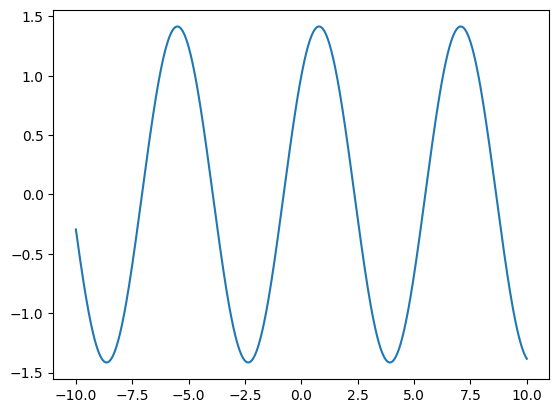

In [ ]:
plt.plot(x, y)

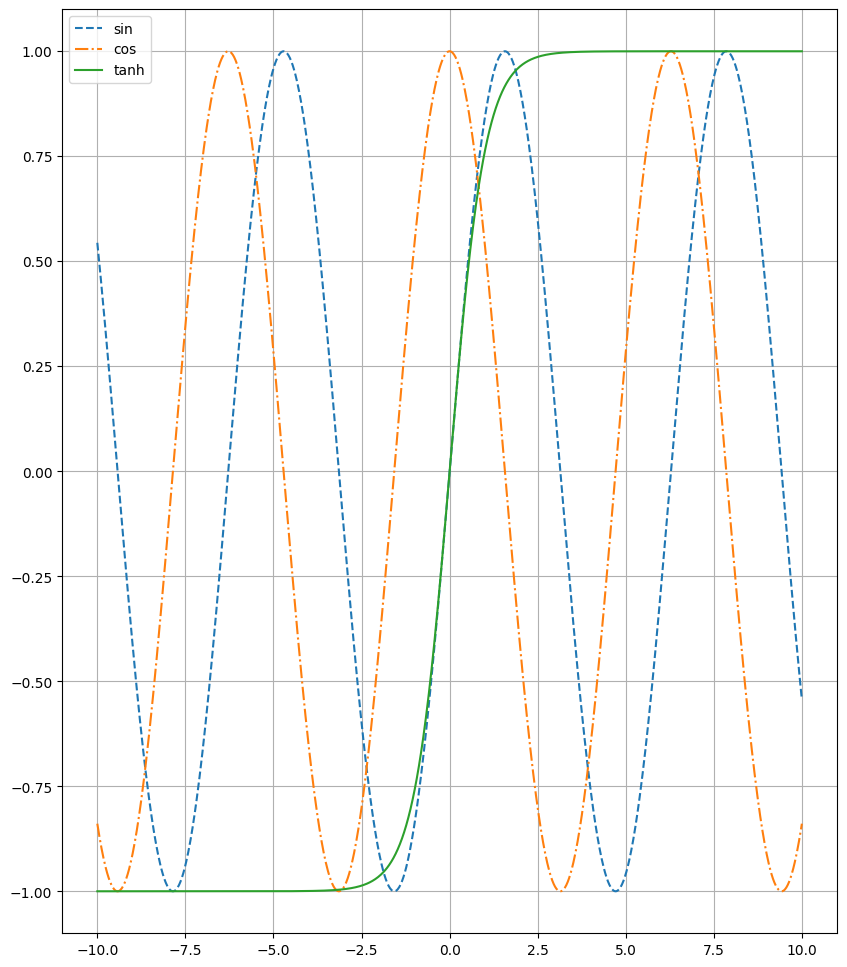

In [ ]:
plt.figure(figsize=(10, 12))
plt.plot(x, np.sin(x), label='sin', linestyle='--')
plt.plot(x, np.cos(x), label='cos', linestyle='-.')
plt.plot(x, np.tanh(x), label='tanh')
plt.legend()
plt.grid()
plt.show()

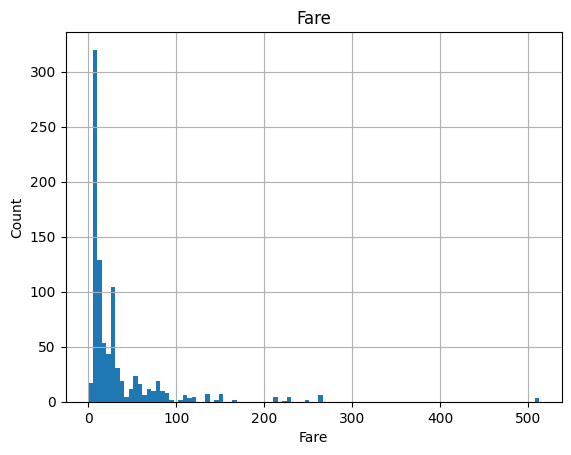

In [ ]:
plt.hist(data['Fare'], bins=100)
plt.title('Fare')
plt.ylabel('Count')
plt.xlabel('Fare')
plt.grid()
plt.show()

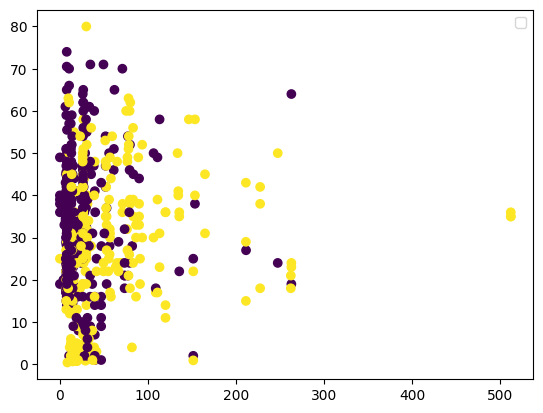

In [ ]:
plt.scatter(x=data.Fare, y=data.Age, c=data.Survived)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
sns.set(style="darkgrid")

<Axes: xlabel='Fare', ylabel='Age'>

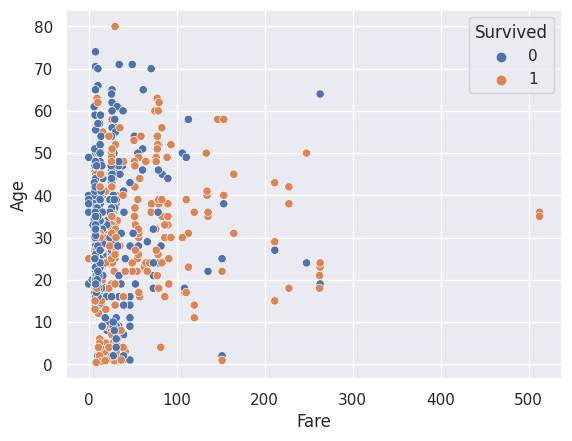

In [ ]:
sns.scatterplot(data, x='Fare', y='Age', hue='Survived')

<Axes: >

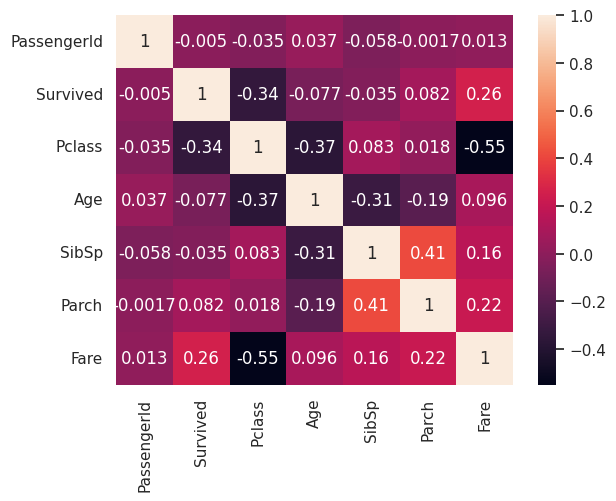

In [ ]:
sns.heatmap(data.corr(), annot=True)

CPU times: user 6.48 s, sys: 246 ms, total: 6.73 s
Wall time: 6.49 s


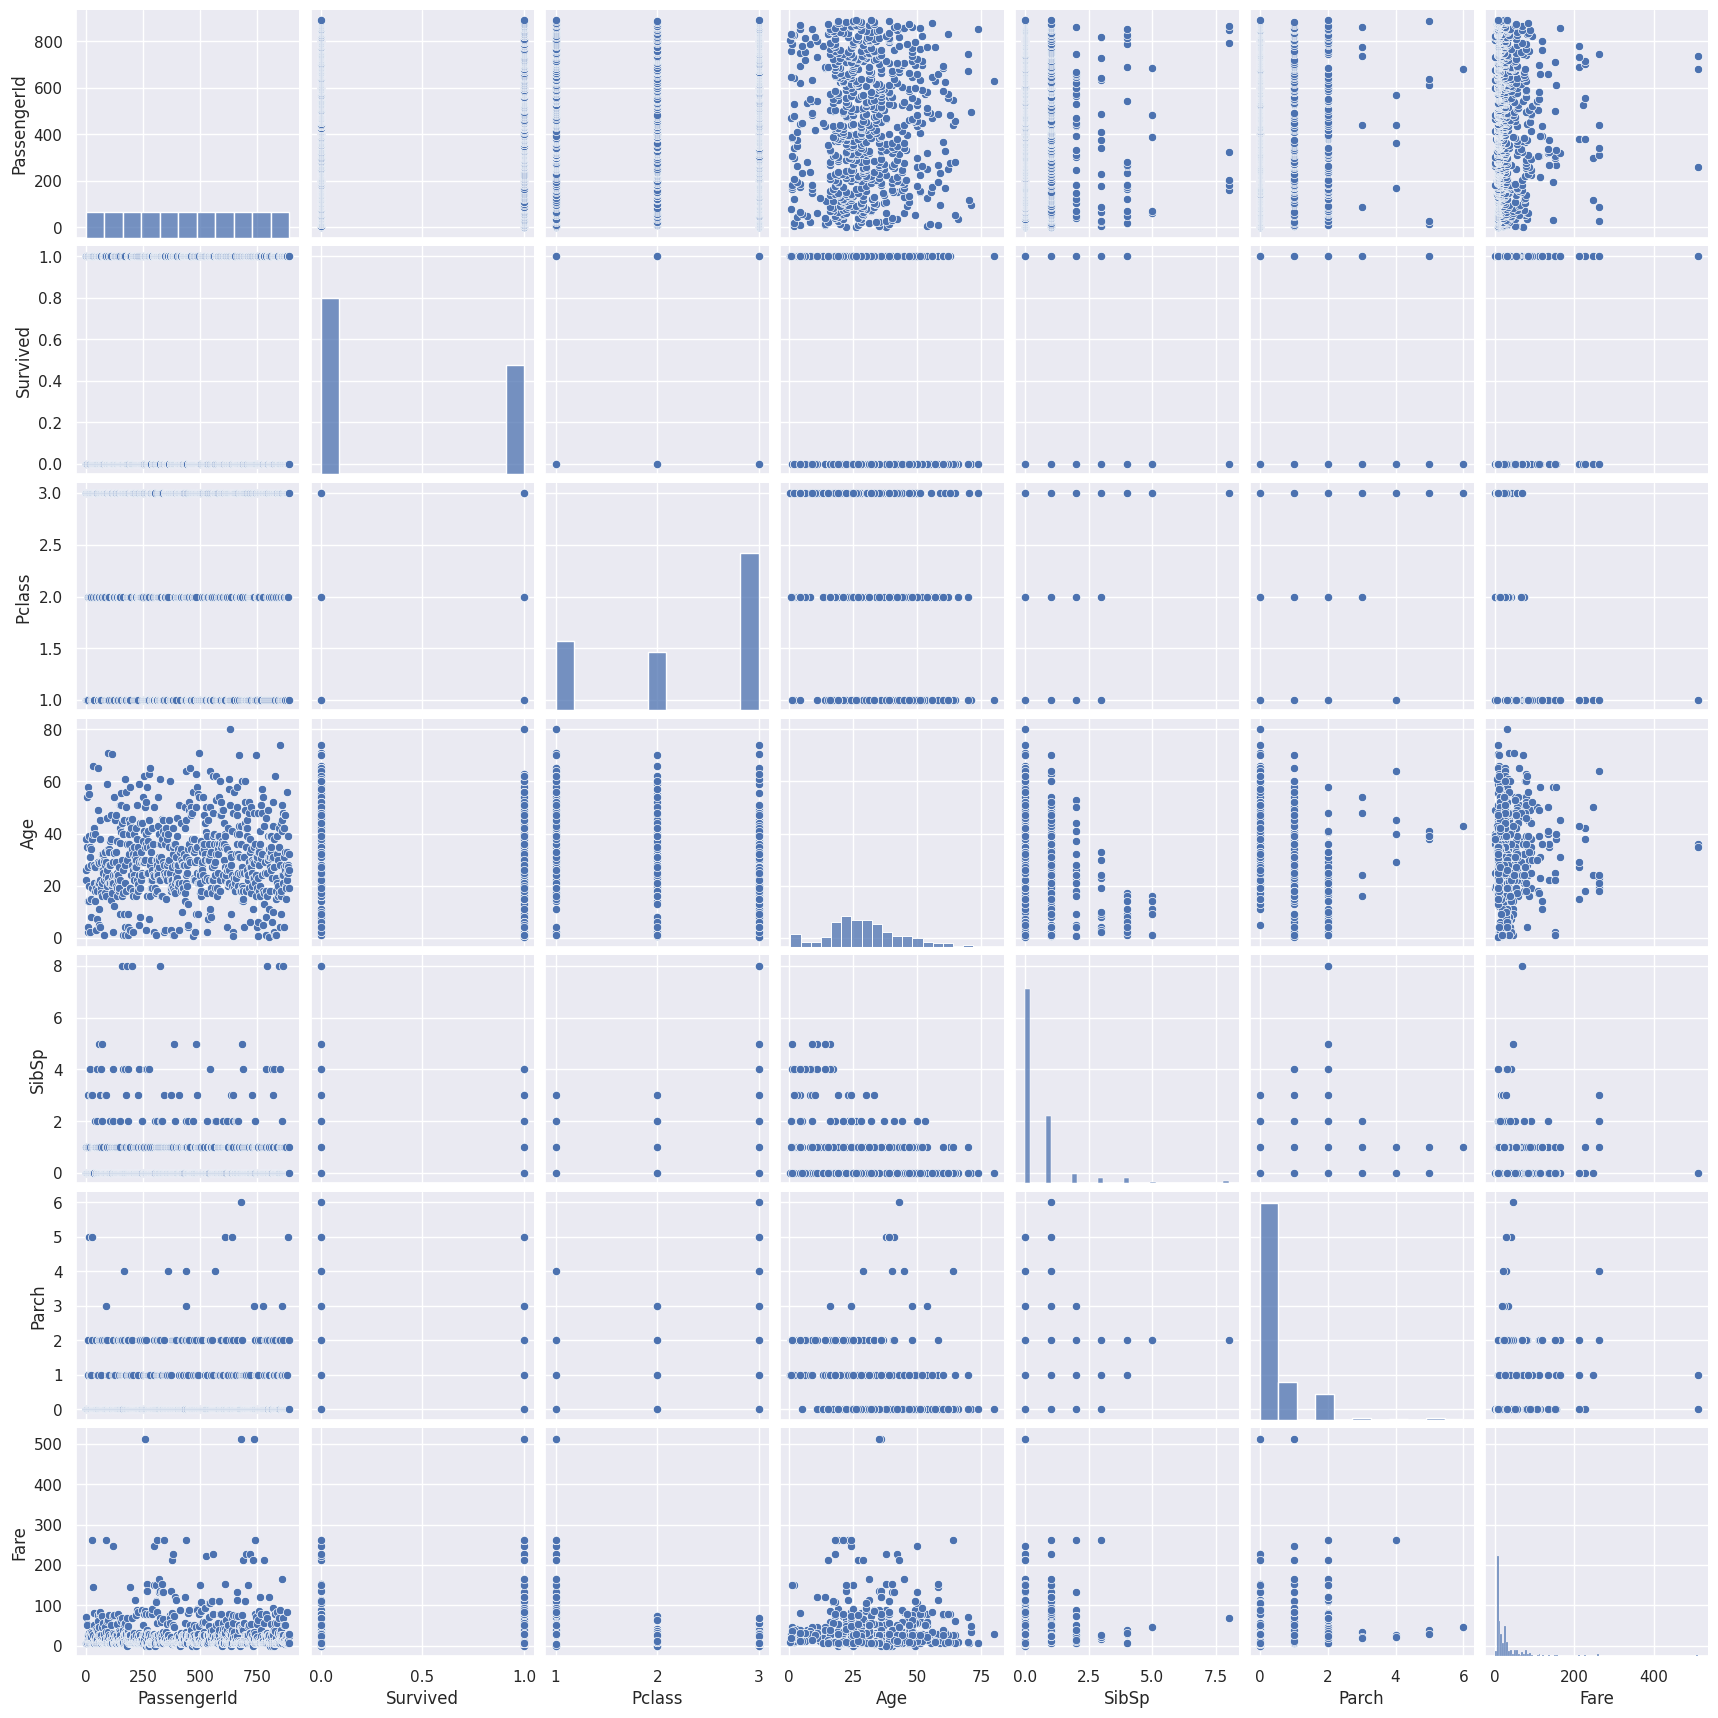

In [ ]:
%%time

sns.pairplot(data)

## `sklearn` и линейная регрессия

### Введение в линейные модели

Напомним, что линейная регрессия &mdash; это модель следующего вида:
$$a(x) = \langle w, x \rangle + w_0$$
где $w \in \mathbb{R}^d$, $w_0 \in \mathbb{R}$. Обучить линейную регрессию &mdash; значит найти $w$ и $w_0$.

В машинном обучении часто говорят об *обобщающей способности модели*, то есть о способности модели работать на новых тестовых данных хорошо. Если модель будет идеально предсказывать выборку, на которой она обучалась, но при этом просто ее запомнит, не "вытащив" из данных никакой закономерности, от нее будет мало толку. Такую модель называют *переобученной*: она слишком подстроилась под обучающие примеры, не выявив никакой полезной закономерности, которая позволила бы ей совершать хорошие предсказания на данных, которые она ранее не видела.

Рассмотрим следующий пример, на котором будет хорошо видно, что значит переобучение модели. Для этого нам понадобится сгенерировать синтетические данные. Рассмотрим зависимость $y(x) = \cos(1.5\pi x)$, $y$ &mdash; целевая переменная, а $x$ - объект (просто число от 0 до 1). В жизни мы наблюдаем какое-то конечное количество пар объект-таргет, поэтому смоделируем это, взяв 30 случайных точек $x_i$ в отрезке $[0;1]$. Более того, в реальной жизни целевая переменная может быть зашумленной (измерения в жизни не всегда точны), смоделируем это, зашумив значение функции нормальным шумом: $\tilde{y}_i = y(x_i) + \mathcal{N}(0, 0.01)$.

Попытаемся обучить три разных линейных модели: признаки для первой &mdash;  $\{x\}$, для второй &mdash; $\{x, x^2, x^3, x^4\}$, для третьей &mdash; $\{x, \dots, x^{20}\}$.

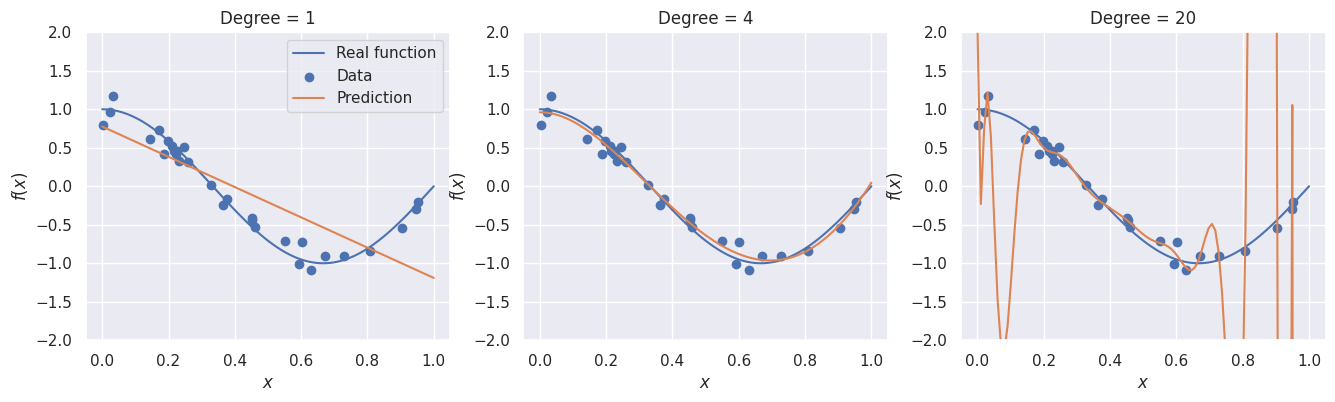

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

**Вопрос 1**: Почему первая модель получилась плохой, а третья переобучилась?

Чтобы избежать переобучения, модель регуляризуют. Обычно переобучения в линейных моделях связаны с большими весами, а поэтому модель часто штрафуют за большие значения весов, добавляя к функционалу качества, например, квадрат $\ell^2$-нормы вектора $w$:

$$Q_{reg}(X, y, a) = Q(X, y, a) + \lambda \|w\|_2^2$$

$$Q_{reg}(X, y, a) = Q(X, y, a) + \lambda \|w\|_1$$

Это слагаемое называют $\ell_2$-регуляризатором, а коэффициент $\lambda$ &mdash; коэффициентом регуляризации.

**Вопрос 2**: Почему большие веса в линейной модели &mdash; плохо?

**Вопрос 3**: Почему регуляризовать $w_0$ &mdash; плохая идея?

**Вопрос 4**: На что влияет коэффициент $\lambda$? Что будет происходить с моделью, если $\lambda$ начать уменьшать? Что будет, если $\lambda$ сделать слишком большим?

### Загружаем данные

In [ ]:
!wget -O 'train.csv' -q 'https://www.dropbox.com/s/cgiksr8htwec3xp/train.csv?dl=0'

- Id - идентификатор квартиры;
- Room - число комнат в квартире;
- Price - стоимость квартиры (в рублях);
- Size - площадь квартиры (в кв.м.);
- Balcony - наличие балкона или лоджии;
- Floor - этаж, на котором расположена квартира;
- FloorsTotal - общее число этажей в здании, в котором расположена квартира;
- Walls - материал стен квартиры;
- Age - квартира расположена в новостройке или во вторичном жилье;
- Lift - тип лифта (пассажирский / грузовой);
- District - район Москвы, в котором расположена квартира;
- Okrug - административный округ (АО) Москвы, в котором расположена квартира.

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,Id,Room,Price,Size,Balcony,Floor,FloorsTotal,Walls,Age,Lift,District,Okrug
0,1,5,210020000.0,198,балкон,1,2,NaN,вторичка,NaN,Сокол,САО
1,2,2,17630000.0,64,NaN,3,8,монолитный,вторичка,грузовой,Зюзино,ЮЗАО
2,3,5,142400000.0,161,балкон,7,7,кирпичный,вторичка,пассажирский,Пресненский,ЦАО
3,4,5,142520000.0,265,NaN,5,5,кирпичный,вторичка,NaN,Басманный,ЦАО
4,5,3,34070000.0,88,NaN,10,42,монолитный,вторичка,грузовой,Хорошевский,САО


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40508 entries, 0 to 40507
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           40508 non-null  int64  
 1   Room         40508 non-null  int64  
 2   Price        40508 non-null  float64
 3   Size         40508 non-null  int64  
 4   Balcony      27758 non-null  object 
 5   Floor        40508 non-null  int64  
 6   FloorsTotal  40508 non-null  int64  
 7   Walls        34623 non-null  object 
 8   Age          39967 non-null  object 
 9   Lift         31082 non-null  object 
 10  District     40151 non-null  object 
 11  Okrug        40151 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.7+ MB


### Предобработка данных

Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью модуля preprocessing

In [ ]:
from sklearn import preprocessing

#### Заполнение пропусков

В матрице объекты-признаки могут быть пропущенные значения, и это вызовет исключение при попытке передать такую матрицу в функцию обучения модели. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:

заполнить средними (mean, median);
предсказывать пропущенные значения по непропущенным.
Последний вариант сложный и применяется редко. Замена пропусков средними в вещественных признаках:

In [ ]:
data.fillna('nan', inplace=True)

Всегда нужно осознавать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака может сам быть важным признаком, который необходимо добавить к другим признакам.

Пример: предсказание возраста пользователя по данным с его телефона. Поскольку люди старшего возраста чаще пользуются простыми телефонами, факт отсутствия каких-то данных (например, истории посещенных интернет-страниц), скорее всего, будет хорошим признаком.

Для категориальных признаков рекомендуется создавать отдельную категорию, соответствующую пропущенному значению.

In [ ]:
categorical_features = [
    'Balcony',
    'Walls',
    'Age',
    'Okrug',
    'District',
    'Lift',
]

In [ ]:
data.columns

Index(['Id', 'Room', 'Price', 'Size', 'Balcony', 'Floor', 'FloorsTotal',
       'Walls', 'Age', 'Lift', 'District', 'Okrug'],
      dtype='object')

#### Преобразование нечисловых признаков

Практически все методы машинного обучения требуют, чтобы на вход функции обучения подавалась вещественная матрица. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам.

Пример: некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Это пример категориального признака, принимающего значения из неупорядоченного конечного множества 
. К таким признакам обычно применяют one-hot encoding (вместо одного признака создают 
 бинарных признаков - по одному на каждое возможное значение исходного признака). В sklearn это можно сделать следующим образом:

In [ ]:
data.Okrug.unique()

array(['САО', 'ЮЗАО', 'ЦАО', 'ЗАО', 'ВАО', 'СЗАО', 'ЮАО', 'ЮВАО', 'СВАО',
       'nan'], dtype=object)

In [ ]:
data.shape

(40508, 12)

In [ ]:
pd.get_dummies(data, columns=categorical_features).shape

(40508, 152)

In [ ]:
categorizer = preprocessing.OneHotEncoder()
X_cat = categorizer.fit_transform(data[categorical_features].values).toarray()

In [ ]:
X_cat.shape

(40508, 146)

#### Масштабирование признаков

При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно по нескольким причинам:

- ускорение обучения модели (пояснение на лекции);
- улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем чисел с плавающей точкой больше, чем с области больших чисел)
- для линейных моделей: интерпретация весов при признаках как меры их значимости.
Первый популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на стандартное отклонение. Реализация в sklearn (нормировать бинарные признаки не нужно):

In [ ]:
numerical_features = list(data.select_dtypes('int64', exclude=['object']).columns)
numerical_features

['Id', 'Room', 'Size', 'Floor', 'FloorsTotal']

In [ ]:
normalizer = preprocessing.StandardScaler()
X_normalized = normalizer.fit_transform(data[numerical_features])

In [ ]:
X_normalized

array([[-1.73200805,  2.56022659,  2.35680203, -0.97909509, -1.34899503],
       [-1.73192253, -0.20055441, -0.18560799, -0.71034236, -0.76878458],
       [-1.73183702,  2.56022659,  1.65479329, -0.1728369 , -0.86548632],
       ...,
       [ 1.73183702,  0.71970592,  0.4215347 ,  0.76779765,  2.71247814],
       [ 1.73192253,  0.71970592, -0.45123292, -0.44158963, -0.67208284],
       [ 1.73200805, -0.20055441, -0.56507217, -0.30721327, -0.67208284]])

Второй популярный способ: вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения. Реализация в sklearn:

In [ ]:
mm_scaler = preprocessing.MinMaxScaler()
X_normalized_norm = mm_scaler.fit_transform(data[numerical_features])

In [ ]:
X_normalized_norm

array([[0.00000000e+00, 1.00000000e+00, 1.11045481e-01, 1.11111111e-02,
        0.00000000e+00],
       [2.46870911e-05, 2.50000000e-01, 3.18960425e-02, 3.33333333e-02,
        6.06060606e-02],
       [4.93741822e-05, 1.00000000e+00, 8.91907856e-02, 7.77777778e-02,
        5.05050505e-02],
       ...,
       [9.99950626e-01, 5.00000000e-01, 5.07974011e-02, 1.55555556e-01,
        4.24242424e-01],
       [9.99975313e-01, 5.00000000e-01, 2.36266982e-02, 5.55555556e-02,
        7.07070707e-02],
       [1.00000000e+00, 2.50000000e-01, 2.00826934e-02, 6.66666667e-02,
        7.07070707e-02]])

Объединяем категориальные и вещественные признаки:

In [ ]:
X = np.hstack((X_normalized, X_cat))
X.shape

(40508, 151)

In [ ]:
y = data['Price'].values

#### Добавление полиномиальных признаков

Генерировать все полиномиальные признаки можно следующим образом:

In [ ]:
pol_feat = preprocessing.PolynomialFeatures(degree=2, include_bias=False) # не включать константный признак
X_pol = pol_feat.fit_transform(X)

In [ ]:
X.shape, X_pol.shape

((40508, 151), (40508, 11627))

Обратите внимание, что новая матрциа может занимать очень много памяти. Генерация полиномиальных признаков нужна, например, в случае, если вы хотите с помощью линейной регрессии настраивать полиномиальную модель зависимости целевого признака от данных.

### Первая модель

*Немного об обучении моделей*. В арсенале дата-саентиста кроме `pandas` и `matplotlib` должны быть библиотеки, позволяющие обучать модели. Для простых моделей (линейные модели, решающее дерево, ...) отлично подходит `sklearn`: в нем очень понятный и простой интерфейс. Несмотря на то, что в `sklearn` есть реализация бустинга и простых нейронных сетей, ими все же не пользуются и предпочитают специализированные библиотеки: `XGBoost`, `LightGBM` и пр. для градиентного бустинга над деревьями, `PyTorch`, `Tensorflow` и пр. для нейронных сетей. Так как мы будем обучать линейную регрессию, нам подойдет реализация из `sklearn`.

Попробуем обучить линейную регрессию на числовых признаках из нашего датасета. В `sklearn` есть несколько классов, реализующих линейную регрессию:
* [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) &mdash; "классическая" линейная регрессия с оптимизацией MSE. Веса находятся как точное решение: $w^* = (X^TX)^{-1}X^Ty$
* [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) &mdash; линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией
* [`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) &mdash; линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией

У моделей из `sklearn` есть методы `fit` и `predict`. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке. Попробуем обучить нашу первую модель на числовых признаках, которые у нас сейчас есть:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
X.shape, X_train.shape, X_test.shape

((40508, 151), (32406, 151), (8102, 151))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

956463781437667.5

Мы обучили первую модель и даже посчитали ее качество на отложенной выборке! Давайте теперь посмотрим на то, как можно оценить качество модели с помощью кросс-валидации. Принцип кросс-валидации изображен на рисунке

<img src="https://docs.splunk.com/images/thumb/e/ee/Kfold_cv_diagram.png/1200px-Kfold_cv_diagram.png" width=50%>

При кросс-валидации мы делим обучающую выборку на $n$ частей (fold). Затем мы обучаем $n$ моделей: каждая модель обучается при отсутствии соответствующего фолда, то есть $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем мы измеряем качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, мы получим "честный результат". После этого, для получения финального значения метрики качества, мы можем усреднить полученные нами $n$ значений.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(lr_model, X_train, y_train, scoring='neg_root_mean_squared_error', verbose=1, cv=3).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s finished


-27089537.738759767

Обратите внимание на то, что результаты `cv_scores` получились отрицательными. Это соглашение в `sklearn` (скоринговую функцию нужно максимизировать). Поэтому все стандартные скореры называются `neg_*`, например, `neg_root_mean_squared_error`.

Обратите внимание, что по отложенной выборке и при кросс-валидации мы считаем RMSE (Root Mean Squared Error), хотя в функционале ошибки при обучении модели используется MSE.

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

**Вопрос**: Почему оптимизация RMSE эквивалентна оптимизации MSE?

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это `alpha` &mdash; коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем `alpha` по логарифмической сетке, чтобы узнать оптимальный порядок величины).

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

956463806437742.6

In [ ]:
np.round(lasso_model.coef_, 5) == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
searcher = GridSearchCV(
    Ridge(), 
    {
        "alpha": np.linspace(0, 10, 5),
     "tol": np.linspace(0, 1, 10)
    },
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
)

In [ ]:
searcher.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
                         'tol': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
searcher.best_params_

{'alpha': 10.0, 'tol': 0.0}

In [ ]:
mean_squared_error(y_test, searcher.best_estimator_.predict(X_test))

956530759713980.4

**Вопрос**: Почему мы не подбираем коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся очень удобным классом [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод `fit`, а для тестовой &mdash; `transform`), а затем обучить/применить модель (для обучающей `fit`, а для тестовой &mdash; `predict`). `Pipeline` позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую.

In [ ]:
from sklearn.pipeline import Pipeline